In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

row index for TCP: 0
103627_b : 1.0
86916_b : 0.99
73576_b : 0.99
39084_b : 0.99
33526_b : 0.99
92605_b : 0.99
75765_b : 0.99
35300_b : 0.99
8782_b : 0.99
192.168.100.99 : 0.99
15008_b : 0.99
146617_b : 0.99
51086_b : 0.99
129691_b : 0.99
130071_b : 0.99
9786_b : 0.99
69222_b : 0.99
9033_b : 0.99
8131_b : 0.99
48147_b : 0.99
14028_141 : 0.99
131106_b : 0.99
7914_b : 0.99
42467_b : 0.99
17265_k : 0.99
41303_b : 0.99
14252_39 : 0.99
88539_b : 0.99
29442_b : 0.99
3473_k : 0.99
17515_b : 0.99
111281_b : 0.99
889_k : 0.99
304_k : 0.99
81613_b : 0.99
18114_179 : 0.99
2834_k : 0.99
173923_b : 0.99
1672_k : 0.99
25326_b : 0.99
33128_b : 0.99
17565_244 : 0.99
62108_p : 0.99
15699_b : 0.99
81614_b : 0.99
23833_b : 0.99
80357_b : 0.99
109688_b : 0.99
814_k : 0.99
50096_b : 0.99
62454.0_p : 0.99
93509_k : 0.99
18415_b : 0.99
24698_b : 0.99
11651_197 : 0.99
47727_p : 0.99
11342_b : 0.99
57463_b : 0.99
18536_b : 0.99
63041_p : 0.99
34944_b : 0.99
9.05_d : 0.99
72674_b : 0.99
16785_128 : 0.99
65478.0

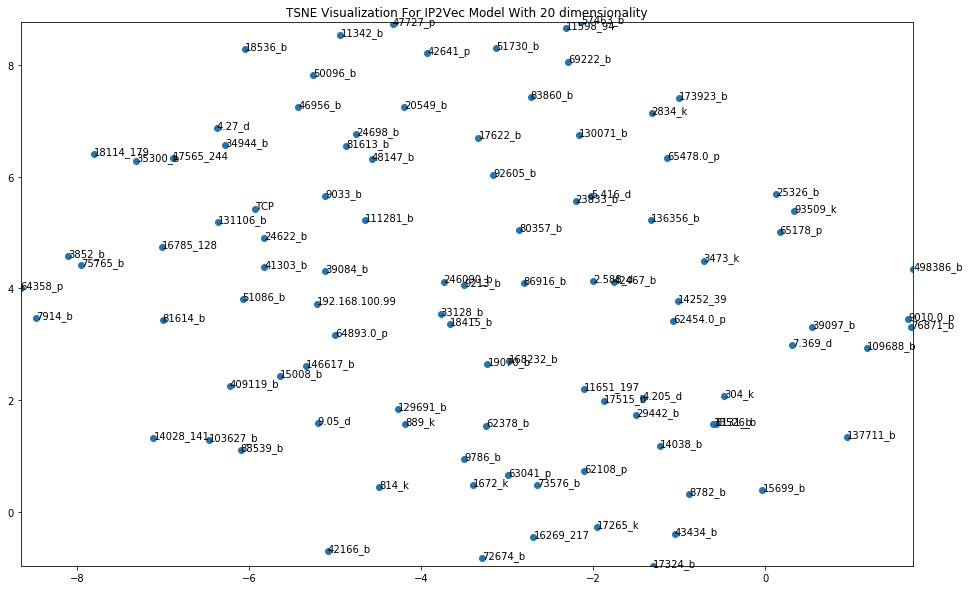

In [2]:
def loadfile(filename):
    pickle_in = open("C:/Users/Akarsh/Downloads/DP_scripts/store_emb/" + filename + ".pickle","rb")
    return pickle.load(pickle_in)

def dot(A,B):
    return (sum(a*b for a,b in zip(A,B)))

def cosine_similarity(a,b):
    return dot(a,b) / ( (dot(a,a) **.5) * (dot(b,b) ** .5) )

def get_target_emb(word):
    get_id = np.where(ip2vec_emb.to_numpy() == word)
    idx = get_id[0][0]
    target_emb = ip2vec_emb.to_numpy()[idx, :20]
    return idx, target_emb

def tsne_plotting(word, top):
    idx, target_emb = get_target_emb(word)
    print("row index for " + word + ":", idx)
    score = {}
    for i, vec in enumerate(ip2vec_emb.to_numpy()):
        if i != idx:
            score[ip2vec_emb['values'][i]] = cosine_similarity(vec[:20], target_emb)
    score = sorted(score.items(), key=lambda x: -x[1])[:top]
    
    close_words = []
    for k, v in score:
        print(k,":",round(v, 2))
        close_words.append(k)

    # add the vector for each of the closest words to the array
    word_labels = [word]
    arr = []
    for wrd in close_words:
        idx, target_emb = get_target_emb(wrd)
        word_labels.append(wrd)
        arr.append(target_emb)

    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(np.array(arr))

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(16, 10))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title('TSNE Visualization For IP2Vec Model With ' + str(20) + ' dimensionality')
    plt.show()

main_str = str(889)
filename = "ip2vec_emb_" + main_str
ip2vec_emb = loadfile(filename)

word = 'TCP'; top = 100
tsne_plotting(word, top)